In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import mra 
import selector as se

In [2]:
plt.rcParams['text.usetex'] = True
np.random.seed(123)
random.seed(123)

# Create parameters

In [3]:
alpha = 1 # proximal term coefficient
rho = 1.
num_points = 10
eps_sublevel = percent = 0.1

num_agents = num_commodities = 100
history = 5
res_type="primal"

filename = "local_mcf_N%d_%.2f_n%d_H%d_%s"%(num_points, eps_sublevel, num_agents, history, res_type)

In [4]:
num_vertices = 15
num_edges = 100

params, A_ineq, b_ineq = mra.mcf_data(num_vertices, num_edges, num_commodities)

In [5]:
b_norm = np.linalg.norm(b_ineq)

# CVXPY centralized solution

In [6]:
true_x, true_f, true_lamb = mra.centralized_multi_commodity_flow(params, A_ineq, b_ineq)
print(f"{true_f=}")

true_f=-127.24864071521705


In [7]:
(true_lamb.max() - true_lamb.min()) / true_lamb.max()

0.9999999999761228

In [8]:
true_lamb.shape, true_x.shape

((100, 1), (10000, 1))

In [9]:
fun_agents_eps = []
fun_agents_noisy_y = []

for i in range(num_agents):
    fun_agents_eps += [lambda lamb_k, K, i=i: mra.mcf_query_multiple_actions(lamb_k, i, params[i], 
                                                                           eps_sublevel=eps_sublevel, K=K, return_best=True)]
    fun_agents_noisy_y += [lambda lamb_k, K, i=i: mra.mcf_query_multiple_actions_noisy_prices(lamb_k, i, params[i], percent=percent, K=K)]

fun_obj_val = lambda x_k: mra.mcf_obj_value(x_k, params)

# Localization

In [10]:
price_max = 3 * true_lamb.max()
price_min = (1./3) * true_lamb.min()
K_i = num_points
N = num_agents
primal_var_size = A_ineq.shape[1]

In [11]:
all_results_eps, lamb_k_eps, _, x_k, _, mra_xk_eps  = mra.price_localization_primal_recovery(fun_agents_eps, fun_obj_val, primal_var_size, A_ineq=A_ineq, b_ineq=b_ineq, 
                                                            price_max=price_max, price_min=price_min, alpha=alpha, relaxed=True, 
                                                            postprocessing=1, K_i=K_i, num_iters=150, 
                                                            method="accpm_l2", true_f=true_f, print_freq=50, eps_lamb=1e-28,
                                                            res_type=res_type, history=history)


all_results_noisy_y, lamb_k_eps, _, x_k, _, mra_xk_noisy_y  = mra.price_localization_primal_recovery(fun_agents_noisy_y, fun_obj_val, primal_var_size, 
                                                                                                      A_ineq=A_ineq, b_ineq=b_ineq, 
                                                            price_max=price_max, price_min=price_min, alpha=alpha, relaxed=True, 
                                                            postprocessing=1, K_i=K_i, num_iters=150, 
                                                            method="accpm_l2", true_f=true_f, print_freq=50, eps_lamb=1e-28,
                                                            res_type=res_type, history=history)

/Users/tepars/anaconda3/envs/py311/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)
/Users/tepars/anaconda3/envs/py311/lib/python3.11/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Users/tepars/Documents/postdoc/mra_precovery/mra

epoch=0, f_subopt_xk=7.2274E-01,  f_subopt_mra=6.9512E-01,  viol_xk=3.3057E+02, viol_mra=3.2598E+02, lamb_rel_diff=INF
epoch=50, f_subopt_xk=6.2899E-02,  f_subopt_mra=6.6295E-03,  viol_xk=5.7256E+01, viol_mra=5.9462E+00, lamb_rel_diff=4.8992E-02
epoch=100, f_subopt_xk=4.6103E-03,  f_subopt_mra=1.8336E-02,  viol_xk=3.9126E+01, viol_mra=3.6419E-01, lamb_rel_diff=3.5822E-02
epoch=149, f_subopt_xk=3.4444E-04,  f_subopt_mra=1.6402E-02,  viol_xk=4.2905E+01, viol_mra=3.8349E-01, lamb_rel_diff=3.5059E-02
epoch=0, f_subopt_xk=7.2274E-01,  f_subopt_mra=7.1712E-01,  viol_xk=3.3057E+02, viol_mra=3.2984E+02, lamb_rel_diff=INF
epoch=50, f_subopt_xk=6.2899E-02,  f_subopt_mra=2.1666E-02,  viol_xk=5.7256E+01, viol_mra=1.2005E+01, lamb_rel_diff=4.8992E-02
epoch=100, f_subopt_xk=4.6103E-03,  f_subopt_mra=7.7685E-03,  viol_xk=3.9126E+01, viol_mra=1.0382E+00, lamb_rel_diff=3.5822E-02
epoch=149, f_subopt_xk=3.4444E-04,  f_subopt_mra=9.0159E-03,  viol_xk=4.2905E+01, viol_mra=9.1494E-01, lamb_rel_diff=3.5059E

In [12]:
if len(all_results_noisy_y["subopt_xk"]) > len(all_results_eps["subopt_xk"]):
    all_res = all_results_noisy_y
else:
    all_res = all_results_eps

T=150
0.0003444367967303642 sub_eps 0.016402360421139465 noisy_y 0.009015936538365694 proj 0.6700951404944379


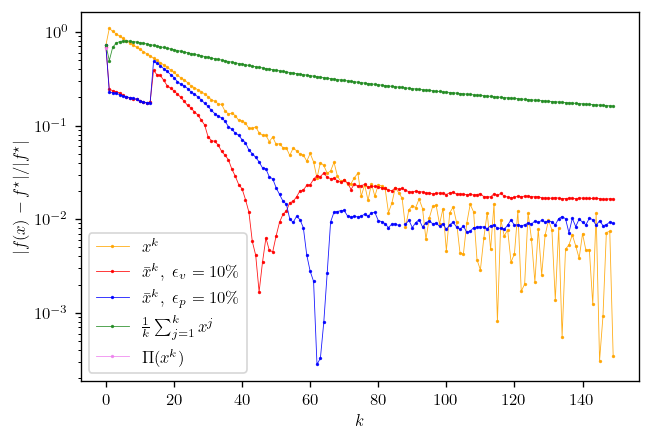

In [13]:
mra.plot_func_subopt_all(all_res, all_results_eps, all_results_noisy_y, true_f, eps_sublevel, percent, 
                        filename=filename)

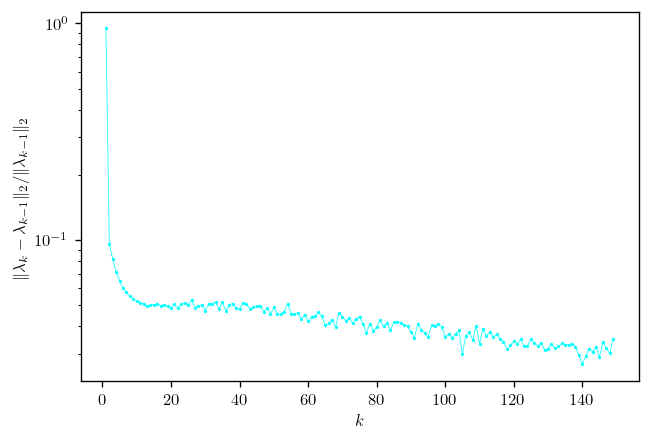

In [14]:
mra.plot_lamb_k_diff(all_res, filename)

In [15]:
print(np.array(all_res["viol_primal_xk"])[-1],
      "sub_eps", np.array(all_results_eps["viol_primal_mra_xk"])[-1],
      "noisy_y", np.array(all_results_noisy_y["viol_primal_mra_xk"])[-1])

23.790084752724436 sub_eps 0.0 noisy_y 1.2684249739436382e-07


In [16]:
print("sub_eps", np.array(all_results_eps["viol_primal_mra_xk"]).size,
      "noisy_y", np.array(all_results_noisy_y["viol_primal_mra_xk"]).size)

sub_eps 150 noisy_y 150


T=150
1.2148524793424593 sub_eps 0.0 noisy_y 6.477275051652996e-09


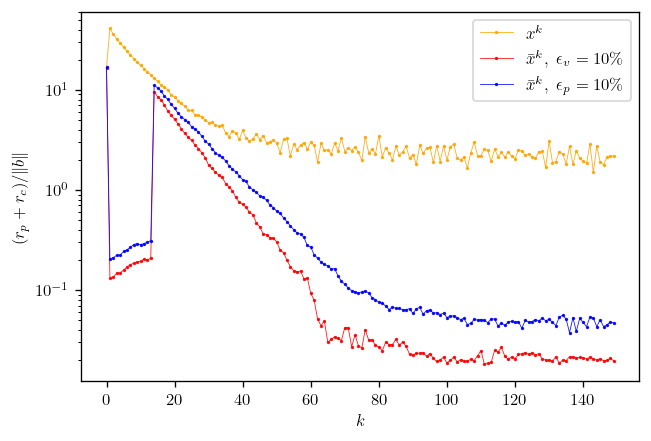

In [17]:
mra.plot_prim_complem_residuals(all_res, all_results_eps, all_results_noisy_y, b_norm, eps_sublevel, percent, 
                               filename=filename)

T=150
1.2148524793424593 sub_eps 0.0 noisy_y 6.477275051652996e-09


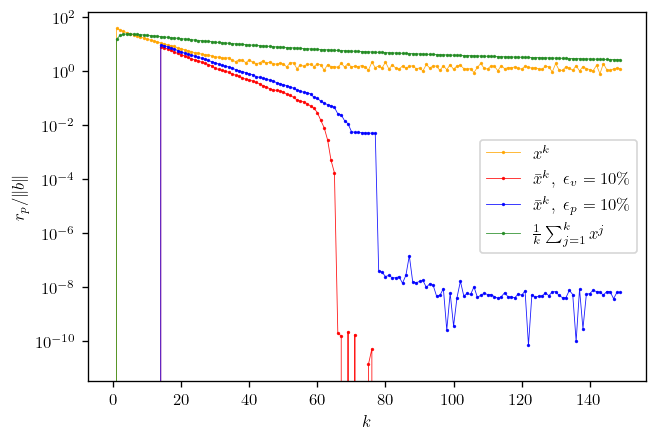

In [18]:
mra.plot_prim_residuals(all_res, all_results_eps, all_results_noisy_y, b_norm, eps_sublevel, percent, 
                       filename=filename)

T=150


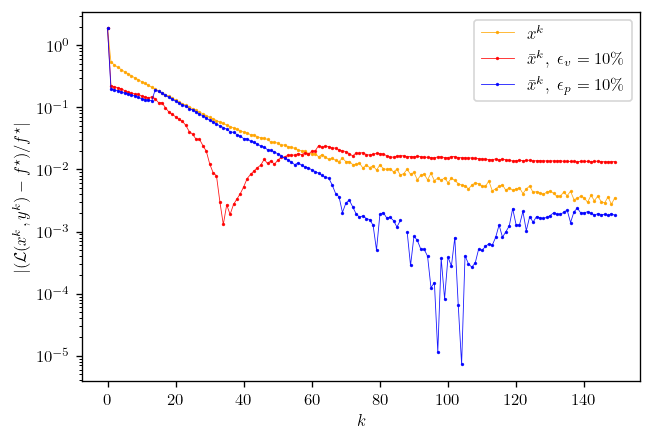

In [19]:
mra.plot_lagr_subopt_all(all_res, all_results_eps, all_results_noisy_y, eps_sublevel, percent, true_f=true_f,
                        filename=filename)

In [20]:
T = 150
idx_xk = np.argmin(np.array(all_res["viol_primal_xk"])[1:]) + 1
idx_paverage = np.argmin(np.array(all_res["viol_primal_paver_xk"])[1:]) + 1
idx_noisy_y = np.argmin(np.array(all_results_noisy_y["viol_primal_mra_xk"][1:])) + 1
idx_eps = np.argmin(np.array(all_results_eps["viol_primal_mra_xk"])[1:]) + 1

print(f"{idx_xk=}, {idx_eps=}, {idx_noisy_y=}, {idx_paverage=}")

print("xk", (np.abs(np.array(all_res["f_xk"]) - true_f)/np.abs(true_f))[idx_xk],
    "sub_eps", (np.abs(np.array(all_results_eps["f_mra_xk"]) - true_f)/np.abs(true_f))[idx_eps],
    "noisy_y", (np.abs(np.array(all_results_noisy_y["f_mra_xk"]) - true_f)/np.abs(true_f))[idx_noisy_y],
    "proj", ((np.abs(np.array(all_res["f_proj_xk"]) - true_f))/np.abs(true_f)).min(),
    "paverage", (np.abs(np.array(all_res["f_paver_xk"]) - true_f)/np.abs(true_f))[idx_paverage])

print("xk", np.array(all_res["viol_primal_xk"])[idx_xk],
      "sub_eps", all_results_eps["viol_primal_mra_xk"][idx_eps],
      "noisy_y", all_results_noisy_y["viol_primal_mra_xk"][idx_noisy_y],
      "paverage", np.array(all_res["viol_primal_paver_xk"])[idx_paverage])

idx_xk=143, idx_eps=1, idx_noisy_y=1, idx_paverage=149
xk 0.0012407090061986221 sub_eps 0.2441478678794673 noisy_y 0.22791516334620518 proj 0.6700951404944379 paverage 0.16143863005855738
xk 15.406689240768435 sub_eps 0.0 noisy_y 0.0 paverage 50.57300915961857


In [21]:
import pickle

with open(f"../results/{filename}_dict.pkl", "wb") as file:
    pickle.dump({"eps":all_results_eps, "noisy_y":all_results_noisy_y}, file)
with open(f"../results/{filename}_dict.pkl", "rb") as file:
    res = pickle.load(file)
# res["eps"].keys()

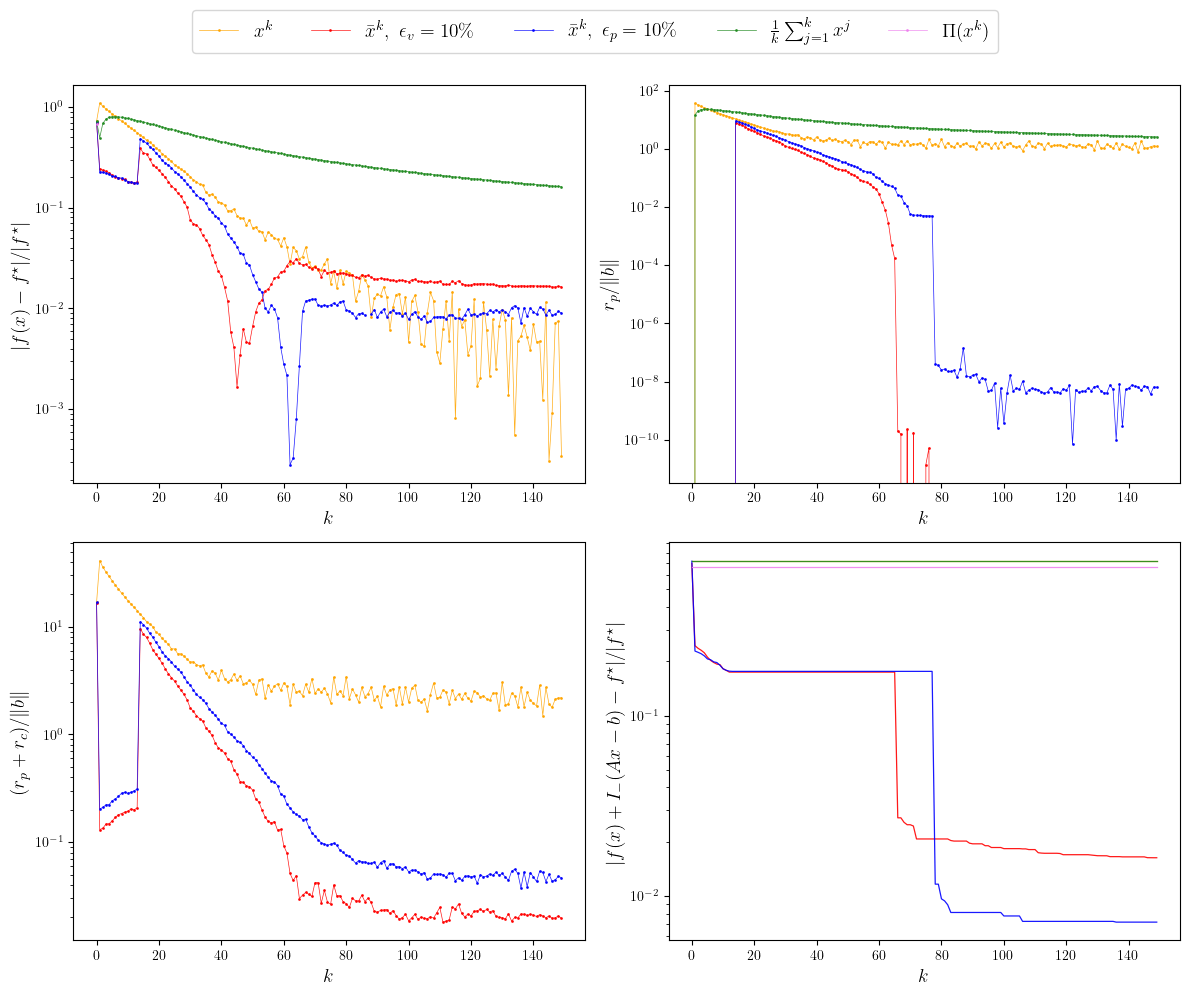

In [22]:
mra.plot_all_methods_metrics_4x(all_results_eps, all_results_noisy_y, true_f, 
                                b_norm, percent, eps_sublevel, filename, T=150)